In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')

In [5]:
path = '/content/data'
for file in os.listdir('/content/data'):
  if not file.startswith('.'):
    df = pd.read_csv(path+'/'+file)
    break

#Data Analysis

In [6]:
df.shape

(186850, 6)

In [7]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [8]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#Let's Clean our Dataset

Simple code to check if the columns have the same Nan values in the same place.

In [9]:
bool_ = df[df.columns[0]].isna()

for col in df.columns[1:]:
  bool_ = bool_ & df[col].isna()
  check = bool_ == df[col].isna()
  for ch in check:
    if not(ch):
      print('There is Difference')
      break
print('The columns have the same null values and they are in the same places :)')

The columns have the same null values and they are in the same places :)


We can directly delete them

In [10]:
df.dropna(inplace=True)

In [11]:
df.query('not(`Order ID` == "Order ID" and `Product` == "Product" and \
 `Quantity Ordered` == "Quantity Ordered" and \
 `Price Each` == "Price Each" and \
  `Order Date` == "Order Date" and \
 `Purchase Address` == "Purchase Address")', inplace=True)

What about Duplicate Values ?

In [83]:
df[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order_Month,Order_Date,Order_Hour,Order_Minute,Total
31,176585,Bose SoundSport Headphones,1,99.99,"823 Highland St, Boston, MA 02215",4,7,11,31,99.99
1302,177795,Apple Airpods Headphones,1,150.00,"740 14th St, Seattle, WA 98101",4,27,19,45,150.00
1684,178158,USB-C Charging Cable,1,11.95,"197 Center St, San Francisco, CA 94016",4,28,21,13,11.95
3805,180207,Apple Airpods Headphones,1,150.00,"196 7th St, Los Angeles, CA 90001",4,13,1,46,150.00
4196,180576,Lightning Charging Cable,1,14.95,"431 Park St, Dallas, TX 75001",4,18,17,23,14.95
...,...,...,...,...,...,...,...,...,...,...
184940,257530,USB-C Charging Cable,1,11.95,"192 Johnson St, San Francisco, CA 94016",9,3,11,13,11.95
186173,258715,Lightning Charging Cable,1,14.95,"550 10th St, Portland, OR 97035",9,15,16,50,14.95
186508,259035,27in FHD Monitor,1,149.99,"327 Lake St, San Francisco, CA 94016",9,29,13,52,149.99
186782,259296,Apple Airpods Headphones,1,150.00,"894 6th St, Dallas, TX 75001",9,28,16,48,150.00


In [85]:
df.drop_duplicates(keep='first', inplace=True)

The data must be clean now

In [94]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Purchase Address    0
Order_Month         0
Order_Date          0
Order_Hour          0
Order_Minute        0
Total               0
dtype: int64

Let's take a look to each column

In [13]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


(None, (185950, 6))

All the columns are object dtype, that's why we have to make some changes :

-Transform Order-id, Quantity Ordered and Price Each to the int dtype
-Split the Order Date into 4 columns : Date, Month, Hour and Min (We don't need the year bcs it's the same for all the records)

In [14]:
df['Order ID'] = df['Order ID'].astype(int)
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

In [15]:
df['Order_Month'] = df['Order Date'].str.split('/').str.get(0)

In [16]:
df['Order_Date'] = df['Order Date'].str.split('/').str.get(1)

In [17]:
df['Order_Hour'] = df['Order Date'].str.split(':').str.get(0).str.split(' ').str.get(1)

In [18]:
df['Order_Minute'] = df['Order Date'].str.split(':').str.get(1)

In [19]:
df['Order_Month'] = df['Order_Month'].astype(int)
df['Order_Date'] = df['Order_Date'].astype(int)
df['Order_Hour'] = df['Order_Hour'].astype(int)
df['Order_Minute'] = df['Order_Minute'].astype(int)

In [20]:
df.drop('Order Date',axis=1, inplace=True)

In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order_Month,Order_Date,Order_Hour,Order_Minute
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,19,8,46
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,7,22,30
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,12,14,38
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,12,14,38
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,30,9,27


We may Also need the Total in our Analysis

In [22]:
df['Total'] = df['Quantity Ordered'] * df['Price Each']

In [23]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order_Month,Order_Date,Order_Hour,Order_Minute,Total
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,19,8,46,23.90
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,7,22,30,99.99
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,12,14,38,600.00
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,12,14,38,11.99
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,30,9,27,11.99


In [24]:
df.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Purchase Address     object
Order_Month           int64
Order_Date            int64
Order_Hour            int64
Order_Minute          int64
Total               float64
dtype: object

In [25]:
df.describe()

,Order ID,Quantity Ordered,Price Each,Order_Month,Order_Date,Order_Hour,Order_Minute,Total
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,7.059140,15.759532,14.413305,29.481361,185.490917
std,51512.737110,0.442793,332.731330,3.502996,8.782176,5.423416,17.317573,332.919771
min,141234.000000,1.000000,2.990000,1.000000,1.000000,0.000000,0.000000,2.990000
25%,185831.250000,1.000000,11.950000,4.000000,8.000000,11.000000,14.000000,11.950000
50%,230367.500000,1.000000,14.950000,7.000000,16.000000,15.000000,29.000000,14.950000
75%,275035.750000,1.000000,150.000000,10.000000,23.000000,19.000000,45.000000,150.000000
max,319670.000000,9.000000,1700.000000,12.000000,31.000000,23.000000,59.000000,3400.000000


Let's explore numerical data

In [26]:
num_col = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
cat_col = [col for col in df.columns if col not in num_col]

In [27]:
num_col, cat_col

(['Order ID',
  'Quantity Ordered',
  'Price Each',
  'Order_Month',
  'Order_Date',
  'Order_Hour',
  'Order_Minute',
  'Total'],
 ['Product', 'Purchase Address'])

160873    5
178158    4
277875    4
196615    4
304802    4
         ..
158177    1
158178    1
158179    1
158180    1
259357    1
Name: Order ID, Length: 178437, dtype: int64


<ipython-input-28-ae30a4337b45>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels, rotation=45, ha='right')


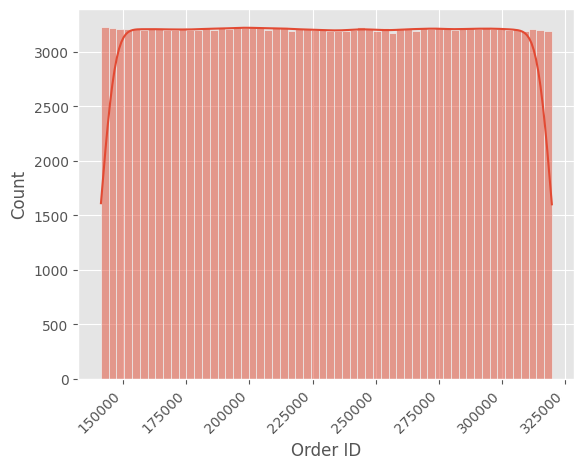

1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64


<ipython-input-28-ae30a4337b45>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels, rotation=45, ha='right')


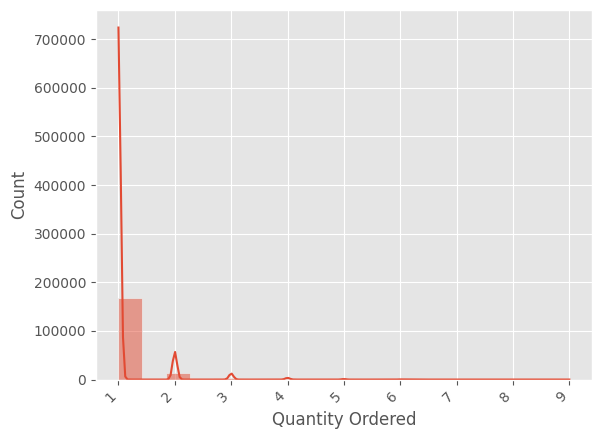

11.95      21903
14.95      21658
2.99       20641
3.84       20577
11.99      18882
150.00     15549
99.99      13325
149.99      7507
700.00      6842
600.00      6837
389.99      6230
379.99      6181
300.00      4800
1700.00     4724
999.99      4128
109.99      4101
400.00      2065
Name: Price Each, dtype: int64


<ipython-input-28-ae30a4337b45>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels, rotation=45, ha='right')


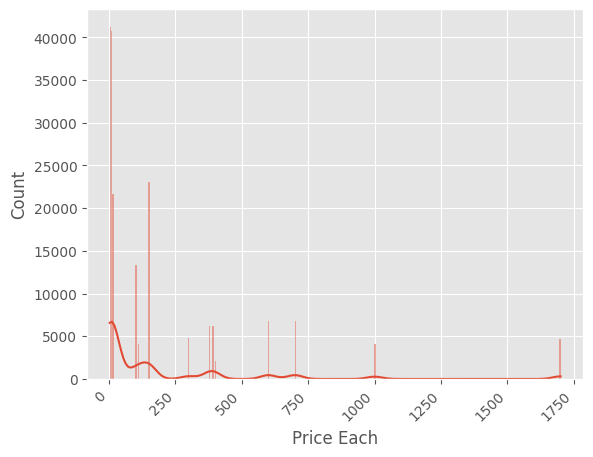

12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
Name: Order_Month, dtype: int64


<ipython-input-28-ae30a4337b45>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels, rotation=45, ha='right')


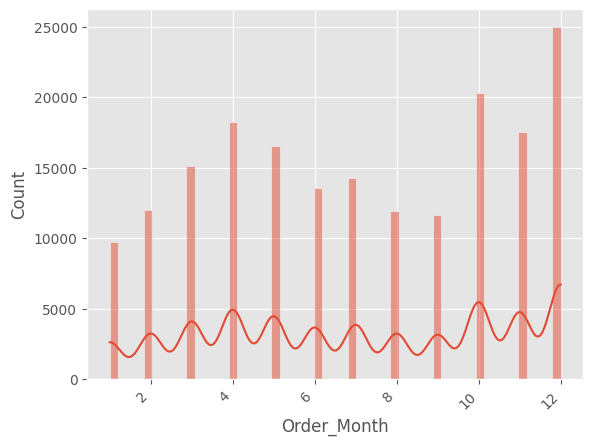

13    6306
10    6249
2     6197
19    6194
17    6177
26    6158
24    6150
20    6148
18    6146
14    6129
27    6117
16    6116
9     6114
15    6114
22    6110
28    6103
12    6093
21    6090
6     6088
8     6073
11    6068
4     6066
25    6064
1     6051
23    6049
7     6033
5     6020
3     5819
29    5720
30    5633
31    3555
Name: Order_Date, dtype: int64


<ipython-input-28-ae30a4337b45>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels, rotation=45, ha='right')


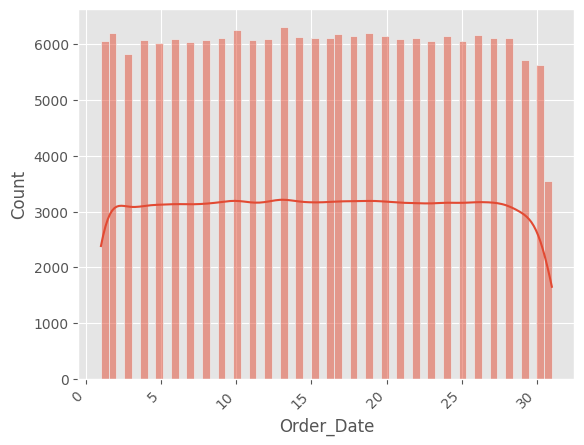

19    12905
12    12587
11    12411
18    12280
20    12228
13    12129
14    10984
10    10944
21    10921
17    10899
16    10384
15    10175
22     8822
9      8748
23     6275
8      6256
7      4011
0      3910
6      2482
1      2350
5      1321
2      1243
4       854
3       831
Name: Order_Hour, dtype: int64


<ipython-input-28-ae30a4337b45>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels, rotation=45, ha='right')


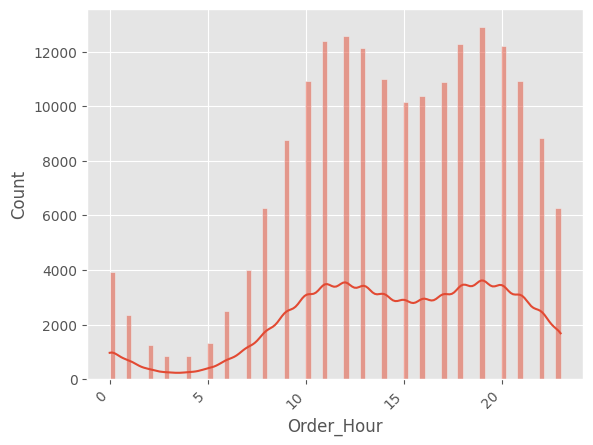

5     3237
48    3199
27    3182
21    3179
16    3175
19    3175
9     3175
35    3175
52    3169
1     3155
46    3145
7     3136
17    3136
44    3133
36    3131
10    3127
13    3126
11    3123
29    3118
37    3117
30    3117
34    3113
57    3111
22    3111
24    3108
12    3107
53    3100
4     3098
50    3097
55    3094
54    3094
39    3093
32    3089
58    3087
59    3082
43    3081
51    3079
25    3077
23    3074
56    3073
33    3072
28    3071
15    3069
47    3068
0     3065
49    3064
38    3064
2     3057
8     3050
20    3048
45    3045
18    3044
41    3043
40    3042
14    3037
26    3032
42    3024
6     3022
31    3018
3     3017
Name: Order_Minute, dtype: int64


<ipython-input-28-ae30a4337b45>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels, rotation=45, ha='right')


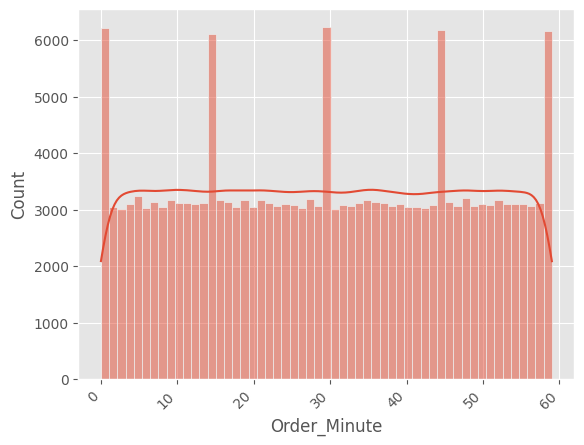

14.95      20210
11.95      20019
11.99      17361
150.00     15438
3.84       15333
2.99       13726
99.99      13195
149.99      7464
600.00      6849
700.00      6835
389.99      6216
379.99      6163
300.00      4891
1700.00     4720
5.98        4630
999.99      4126
109.99      4073
7.68        3874
400.00      2062
23.90       1713
8.97        1502
23.98       1380
29.90       1344
11.52       1033
11.96        524
15.36        250
14.95        166
35.85        157
35.97        128
199.98       128
44.85         97
19.20         69
17.94         63
299.98        43
219.98        28
20.93         22
759.98        18
23.04         16
779.98        14
47.96         13
47.80         12
59.80          7
1200.00        7
1400.00        7
23.92          5
3400.00        4
800.00         3
26.91          3
26.88          2
1999.98        2
299.97         2
71.70          1
450.00         1
59.75          1
Name: Total, dtype: int64


<ipython-input-28-ae30a4337b45>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels, rotation=45, ha='right')


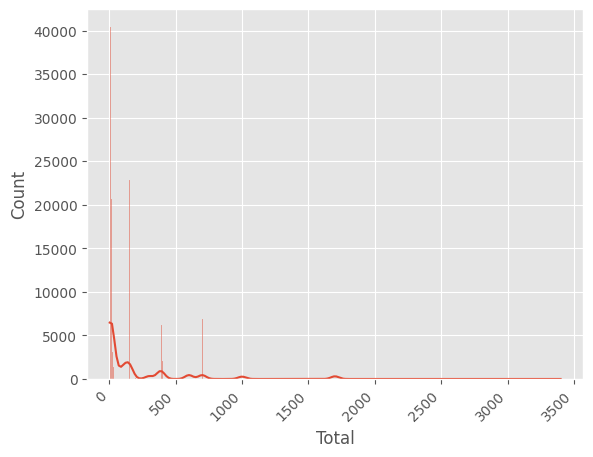

In [28]:
for col in num_col:
  print(df[col].value_counts())
  ax = sns.histplot(x=col, data=df, kde=True)
  xticklabels = ax.get_xticklabels()
  ax.set_xticklabels(xticklabels, rotation=45, ha='right')
  plt.show()

-
Most customers order just 1 quantity of the product
-
The orders are high in december



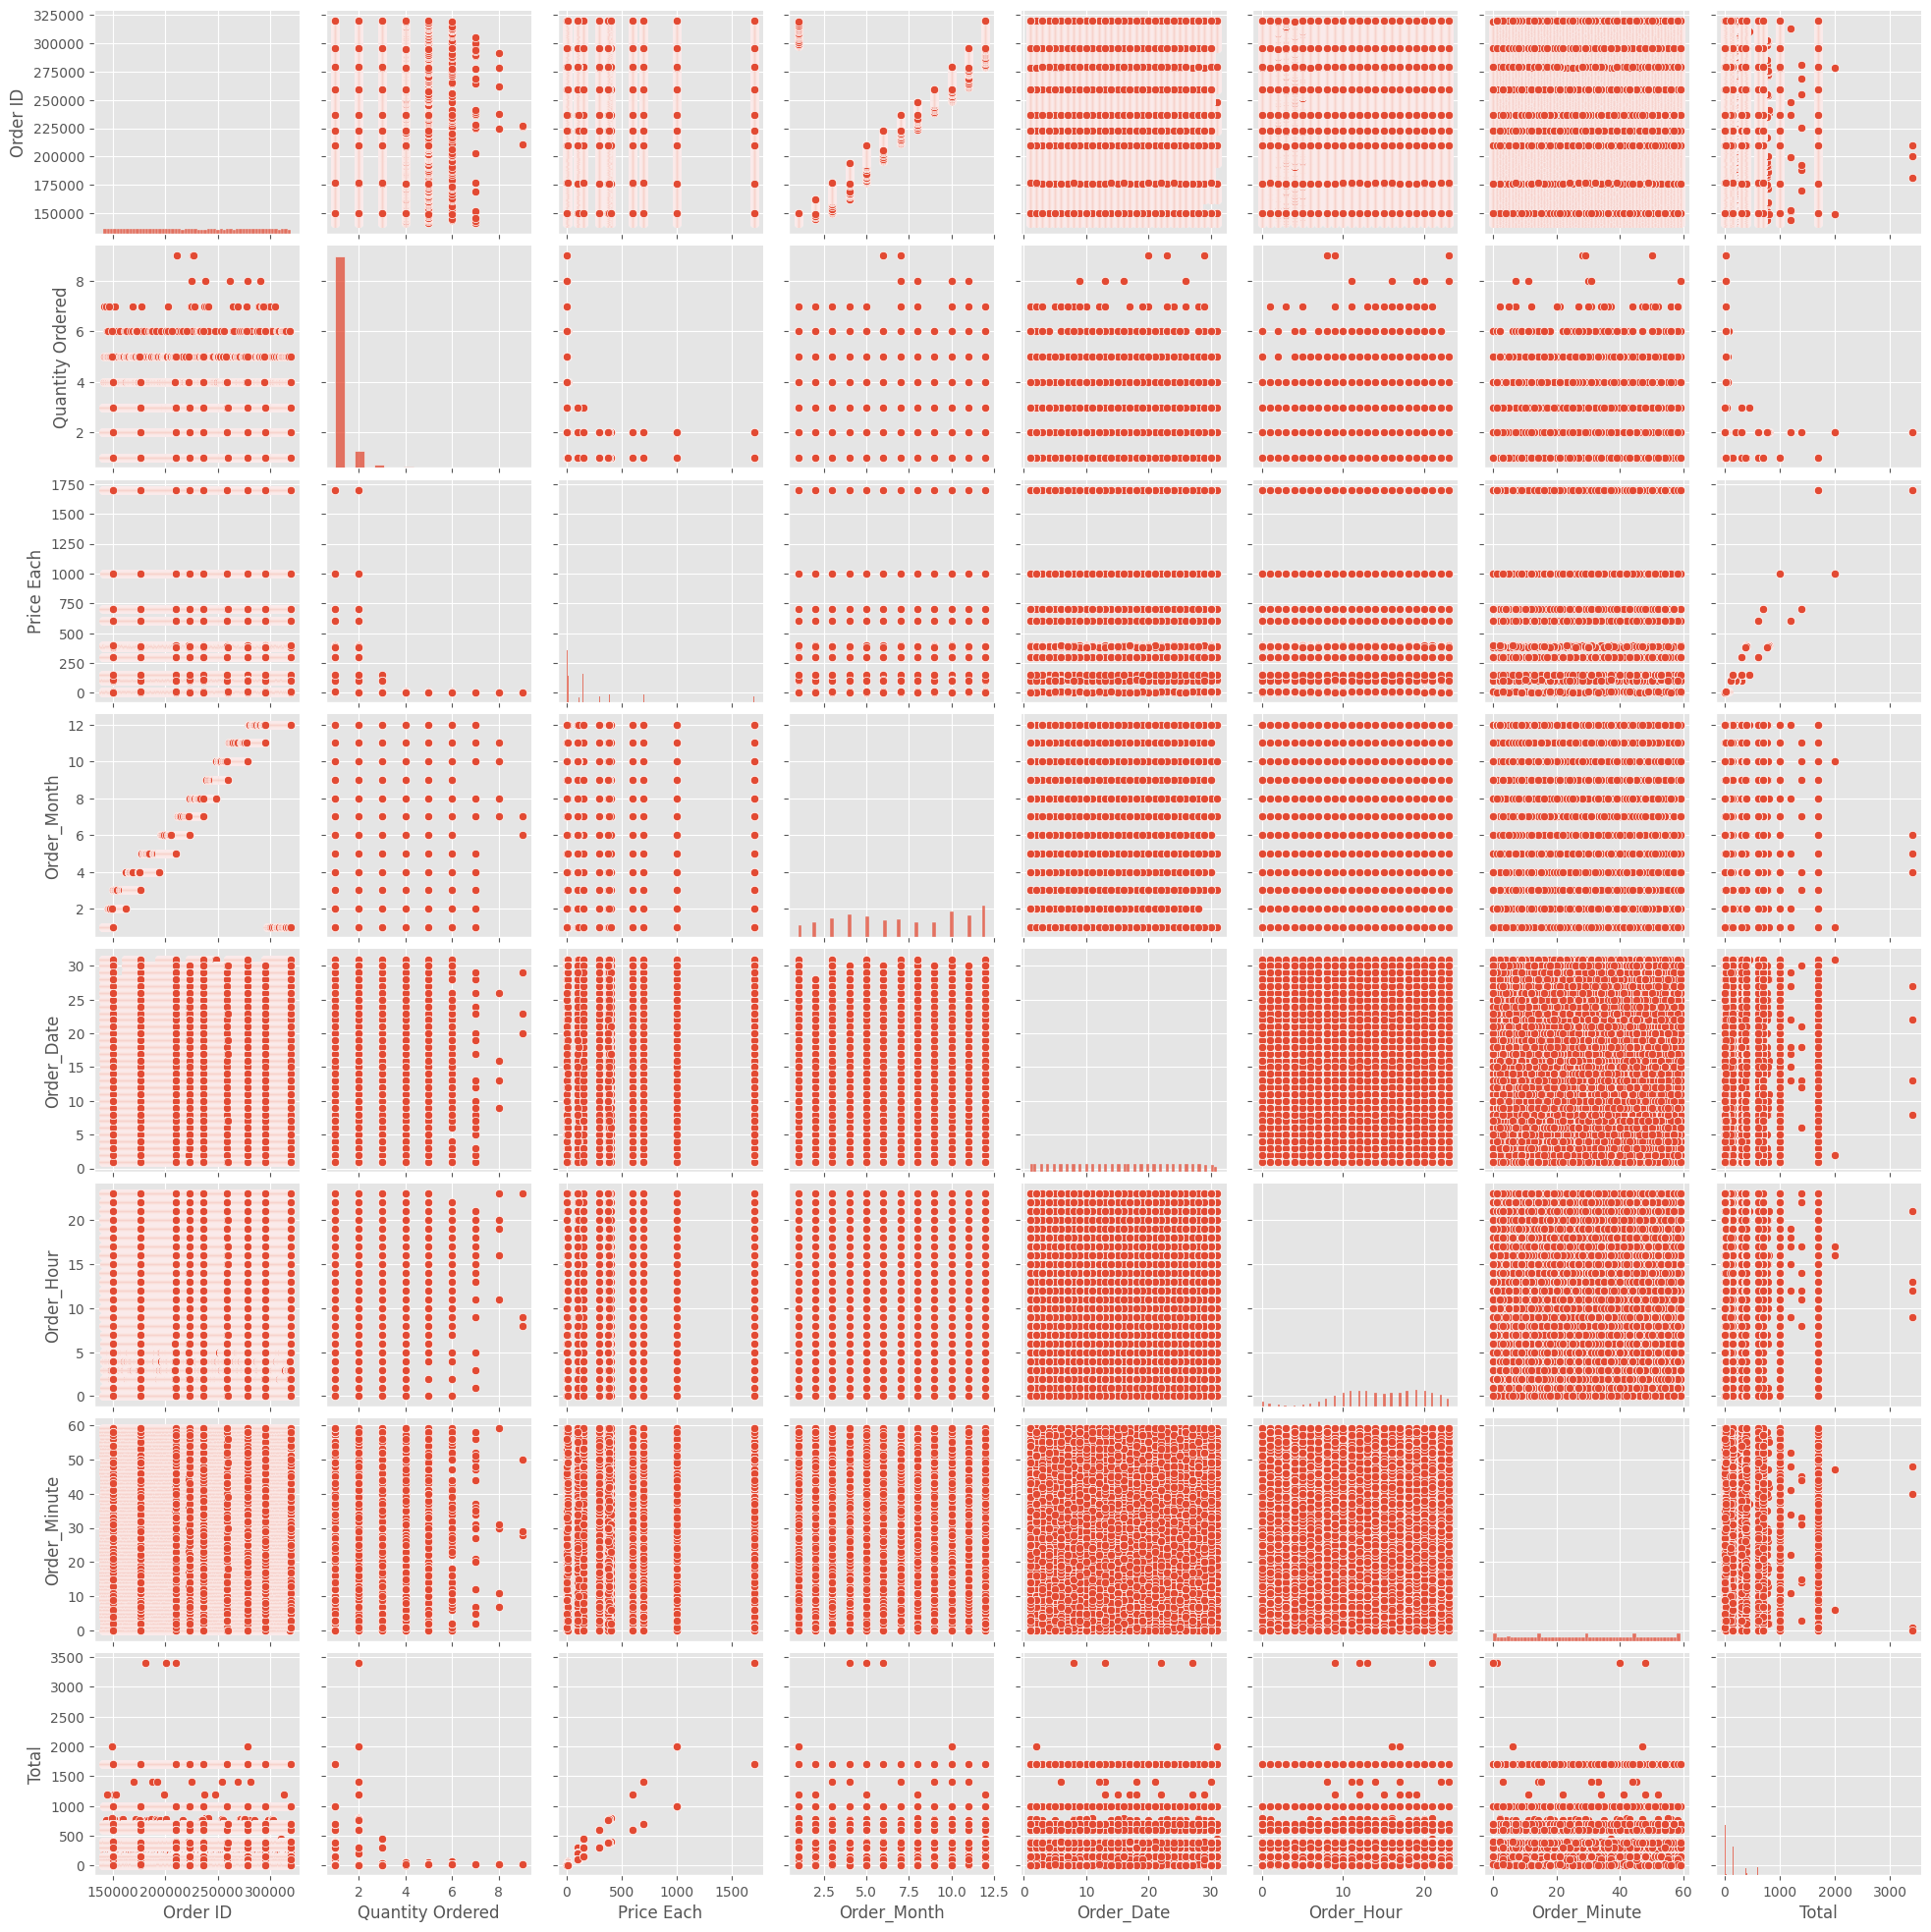

In [29]:
sns.pairplot(df[num_col])
plt.show()

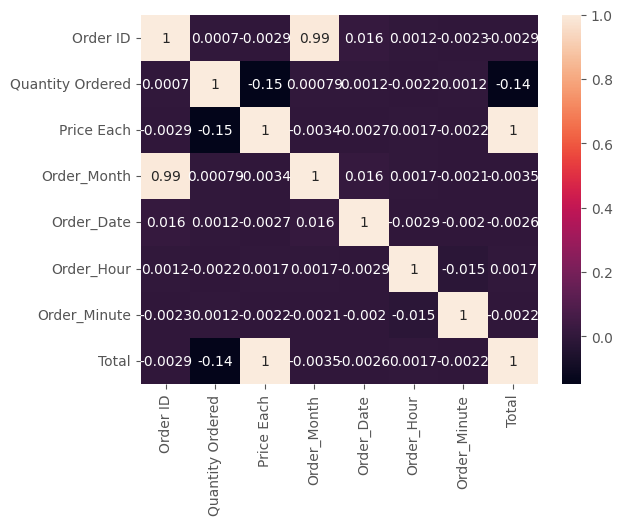

In [30]:
sns.heatmap(df[num_col].corr(), annot=True)
plt.show()

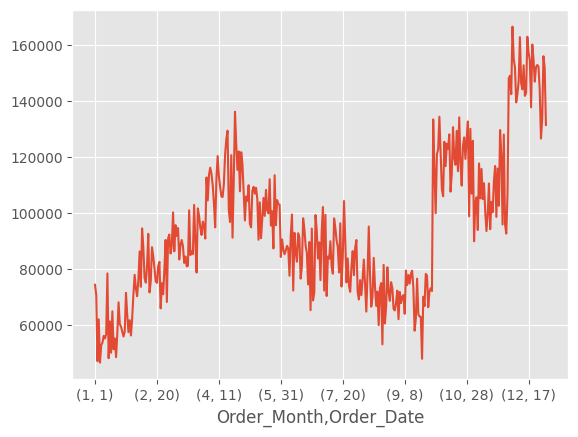

In [105]:
df.groupby(['Order_Month','Order_Date'])['Total'].apply('sum').plot()
plt.show()

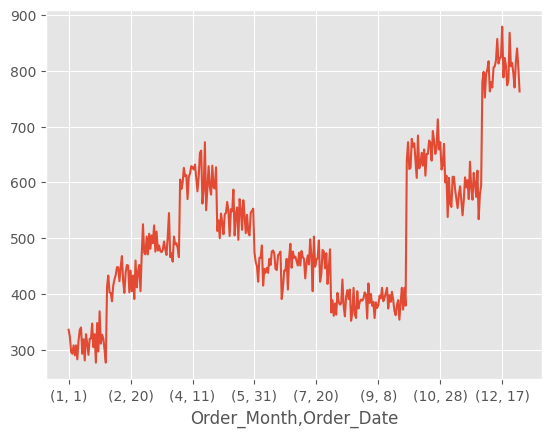

In [106]:
df.groupby(['Order_Month','Order_Date'])['Quantity Ordered'].apply('count').plot()
plt.show()

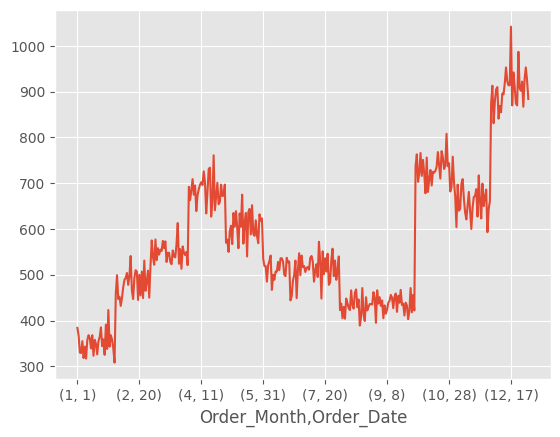

In [108]:
df.groupby(['Order_Month','Order_Date'])['Quantity Ordered'].apply('sum').plot()
plt.show()

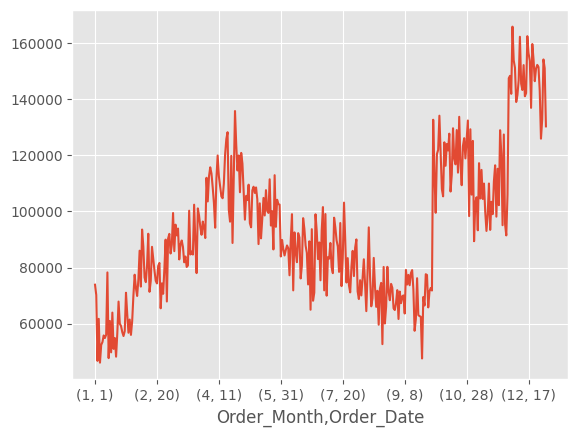

In [110]:
df.groupby(['Order_Month','Order_Date'])['Price Each'].apply('sum').plot()
plt.show()

In [113]:
df.describe(include=['O'])

,Product,Purchase Address
count,185686,185686
unique,19,140787
top,USB-C Charging Cable,"193 Forest St, San Francisco, CA 94016"
freq,21859,9


We have only 19 unique products.

We can extract from the Purchase Address some useful informations, like the address, state, city and zip code.

In [129]:
df['Address'] = df['Purchase Address'].str.split(',').str.get(0)

In [134]:
df['City'] = df['Purchase Address'].str.split(',').str.get(1).str.strip()

In [140]:
df['State'] = df['Purchase Address'].str.split(',').str.get(2).str.strip().str.split(' ').str.get(0)

In [145]:
df['Zip_Code'] = df['Purchase Address'].str.split(',').str.get(2).str.strip().str.split(' ').str.get(1).str.strip().astype(int)

In [154]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order_Month,Order_Date,Order_Hour,Order_Minute,Total,Address,City,State,Zip_Code
0,176558,USB-C Charging Cable,2,11.95,4,19,8,46,23.90,917 1st St,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,4,7,22,30,99.99,682 Chestnut St,Boston,MA,2215
3,176560,Google Phone,1,600.00,4,12,14,38,600.00,669 Spruce St,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.99,4,12,14,38,11.99,669 Spruce St,Los Angeles,CA,90001
5,176561,Wired Headphones,1,11.99,4,30,9,27,11.99,333 8th St,Los Angeles,CA,90001


Now we have a beautiful dataset :)

# Business Questions

#Question 1: What was the best month for sales? How much was earned that month?


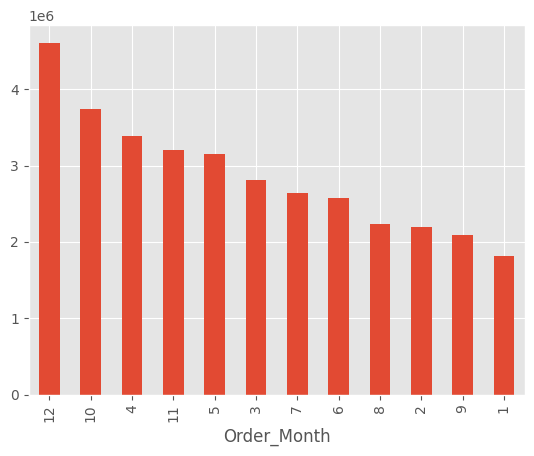

Order_Month
12    4608295.70
10    3734777.86
4     3389217.98
11    3197875.05
5     3150616.23
3     2804973.35
7     2646461.32
6     2576280.15
8     2241083.37
2     2200078.08
9     2094465.69
1     1821413.16
Name: Total, dtype: float64

In [178]:
df.groupby('Order_Month')['Total'].apply('sum').sort_values(ascending=False).plot(kind='bar')
plt.show()
df.groupby('Order_Month')['Total'].apply('sum').sort_values(ascending=False)

# Question 2: What city sold the most product?

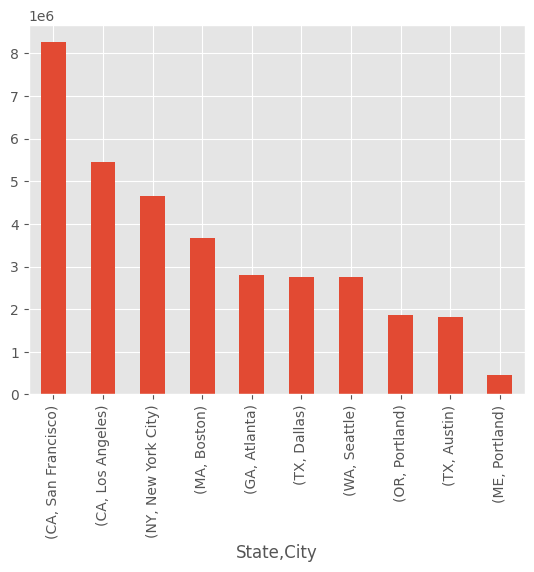

State  City         
CA     San Francisco    8254743.55
       Los Angeles      5448304.28
NY     New York City    4661867.14
MA     Boston           3658627.65
GA     Atlanta          2794199.07
TX     Dallas           2765373.96
WA     Seattle          2745046.02
OR     Portland         1870010.56
TX     Austin           1818044.33
ME     Portland          449321.38
Name: Total, dtype: float64

In [177]:
df.groupby(['State','City'])['Total'].apply('sum').sort_values(ascending=False).plot(kind='bar')
plt.show()
df.groupby(['State','City'])['Total'].apply('sum').sort_values(ascending=False)

#What time should we display advertisements to maximize likelihood of customer's buying product?

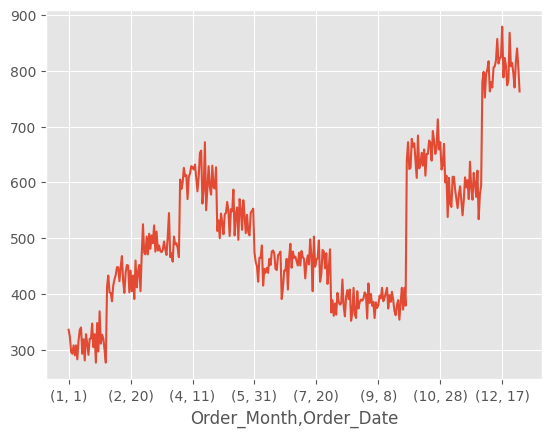

Order_Month  Order_Date
1            23            277
             31            277
             14            281
             8             283
             6             290
                          ... 
12           16            825
             29            840
             13            857
             23            868
             17            879
Name: Order ID, Length: 365, dtype: int64

In [223]:
df.groupby(['Order_Month','Order_Date'])['Order ID'].apply('count').plot(kind='line')
plt.show()
df.groupby(['Order_Month','Order_Date'])['Order ID'].apply('count').sort_values(ascending=True)

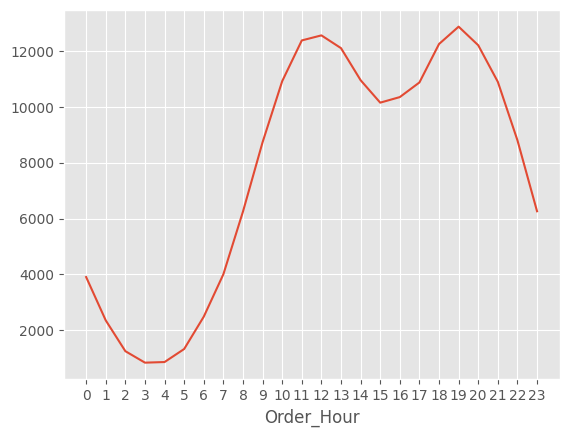

Order_Hour
19    12886
12    12573
11    12392
18    12263
20    12218
13    12115
14    10965
10    10929
21    10905
17    10884
16    10359
15    10159
22     8808
9      8740
23     6262
8      6252
7      4002
0      3902
6      2481
1      2347
5      1320
2      1242
4       852
3       830
Name: Order ID, dtype: int64

In [224]:
df.groupby(['Order_Hour'])['Order ID'].apply('count').plot(kind='line')
plt.xticks(df['Order_Hour'].unique())
plt.show()
df.groupby(['Order_Hour'])['Order ID'].apply('count').sort_values(ascending=False)

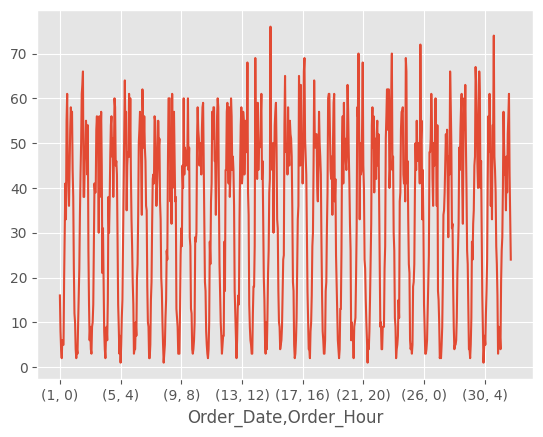

Order_Date  Order_Hour
15          11            76
30          19            74
25          18            72
23          19            70
21          12            70
                          ..
            4              2
8           3              1
5           4              1
30          2              1
22          3              1
Name: Order ID, Length: 744, dtype: int64

In [219]:
df.query('`Order_Month` == 12').groupby(['Order_Date','Order_Hour'])['Order ID'].apply('count').plot(kind='line')
plt.show()
df.query('`Order_Month` == 12').groupby(['Order_Date','Order_Hour'])['Order ID'].apply('count').sort_values(ascending=False)

#Question 4: What products are most often sold together?

In [278]:
order_id = df.groupby('Order ID')['Product'].count().sort_values(ascending=False)
order_filtered = order_id[order_id>1]
order_filtered

Order ID
160873    5
242936    4
289117    4
312462    4
295681    4
         ..
143146    2
146871    2
230475    2
233659    2
316706    2
Name: Product, Length: 6879, dtype: int64

In [293]:
filtered_df = df[df['Order ID'].isin(order_filtered.index)]
print('we have',filtered_df['Order ID'].unique().shape[0],'unique orders')
filtered_df.head()

we have 6879 unique orders


,Order ID,Product,Quantity Ordered,Price Each,Order_Month,Order_Date,Order_Hour,Order_Minute,Total,Address,City,State,Zip_Code
3,176560,Google Phone,1,600.00,4,12,14,38,600.00,669 Spruce St,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.99,4,12,14,38,11.99,669 Spruce St,Los Angeles,CA,90001
18,176574,Google Phone,1,600.00,4,3,19,42,600.00,20 Hill St,Los Angeles,CA,90001
19,176574,USB-C Charging Cable,1,11.95,4,3,19,42,11.95,20 Hill St,Los Angeles,CA,90001
32,176586,AAA Batteries (4-pack),2,2.99,4,10,17,0,5.98,365 Center St,San Francisco,CA,94016


In [286]:
filtered_df.groupby('Product')['Order ID'].count()

Product
20in Monitor                   153
27in 4K Gaming Monitor         241
27in FHD Monitor               276
34in Ultrawide Monitor         232
AA Batteries (4-pack)          730
AAA Batteries (4-pack)         757
Apple Airpods Headphones       926
Bose SoundSport Headphones     766
Flatscreen TV                  166
Google Phone                  1633
LG Dryer                        25
LG Washing Machine              28
Lightning Charging Cable      1734
Macbook Pro Laptop             190
ThinkPad Laptop                172
USB-C Charging Cable          2025
Vareebadd Phone                601
Wired Headphones              1609
iPhone                        1864
Name: Order ID, dtype: int64

In [367]:
result = {}

for order in filtered_df['Order ID'].unique():
    products = filtered_df.loc[filtered_df['Order ID'] == order, 'Product'].sort_values().values
    for i in range(len(products)):
        if products[i] not in result:
            result[products[i]] = {}
        for j in range(i + 1, len(products)):
            if products[j] not in result[products[i]]:
                result[products[i]][products[j]] = 1
            else:
                result[products[i]][products[j]] += 1

In [368]:
result

{'Google Phone': {'Wired Headphones': 422,
  'USB-C Charging Cable': 997,
  'ThinkPad Laptop': 6,
  'Lightning Charging Cable': 28,
  'Vareebadd Phone': 5,
  'Macbook Pro Laptop': 7,
  'LG Washing Machine': 1,
  'iPhone': 9,
  'LG Dryer': 1},
 'Wired Headphones': {'iPhone': 462, 'Wired Headphones': 2},
 'USB-C Charging Cable': {'Vareebadd Phone': 368,
  'Wired Headphones': 203,
  'iPhone': 29,
  'USB-C Charging Cable': 4},
 'AAA Batteries (4-pack)': {'Google Phone': 22,
  'Bose SoundSport Headphones': 57,
  'USB-C Charging Cable': 95,
  'ThinkPad Laptop': 27,
  'Apple Airpods Headphones': 81,
  'iPhone': 31,
  'Macbook Pro Laptop': 18,
  'Wired Headphones': 86,
  'Lightning Charging Cable': 80,
  'AAA Batteries (4-pack)': 19,
  'Flatscreen TV': 21,
  'Vareebadd Phone': 6,
  'LG Washing Machine': 4,
  'LG Dryer': 2},
 'Lightning Charging Cable': {'USB-C Charging Cable': 100,
  'iPhone': 1011,
  'Wired Headphones': 129,
  'Vareebadd Phone': 4,
  'ThinkPad Laptop': 20,
  'Macbook Pro Lapt

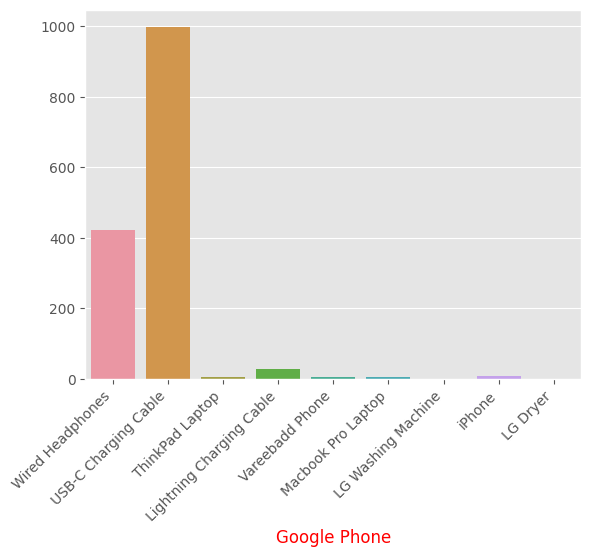

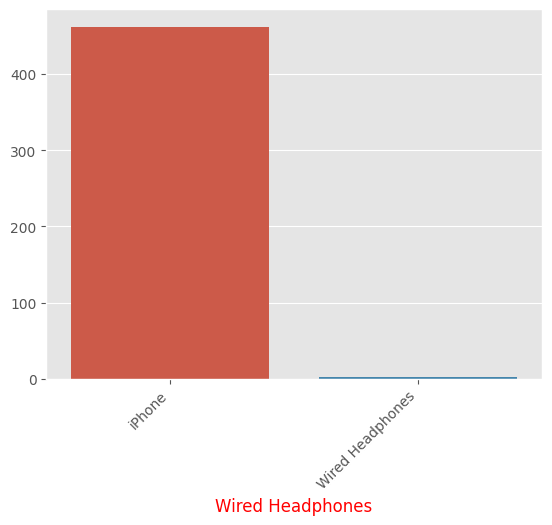

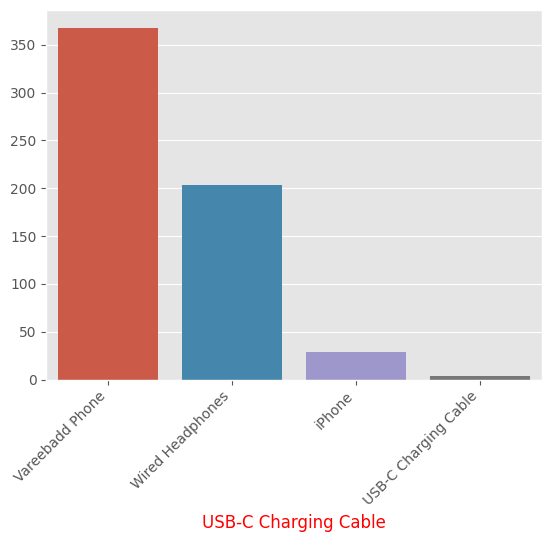

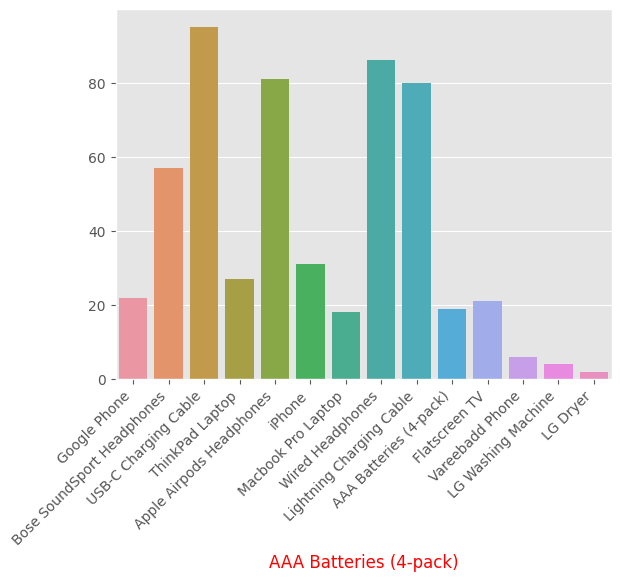

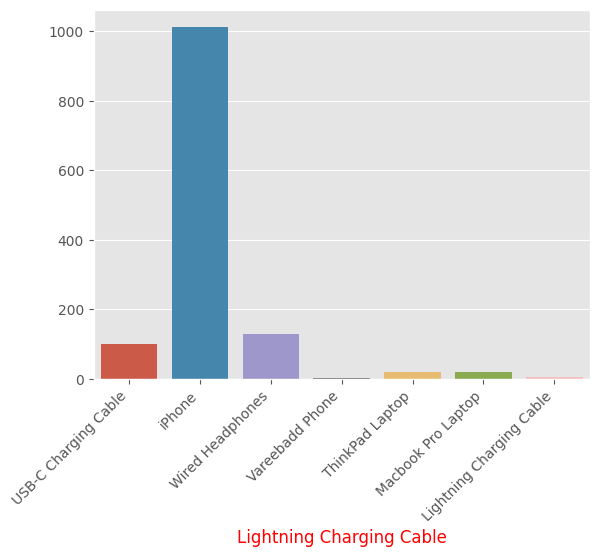

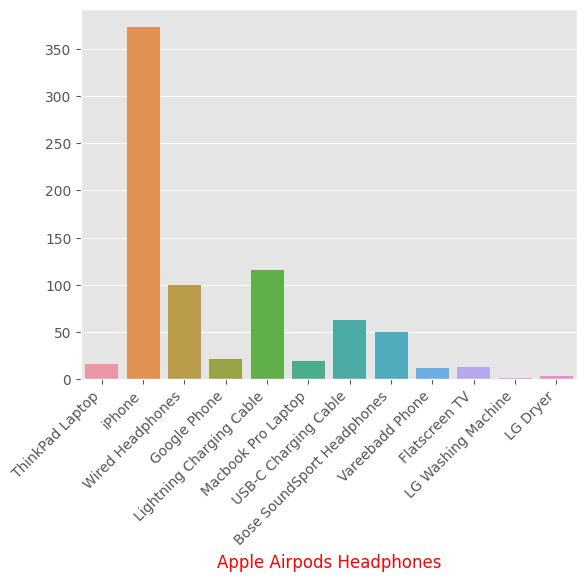

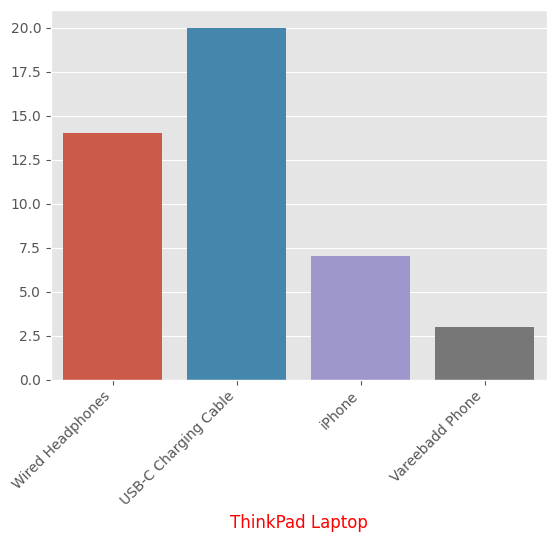

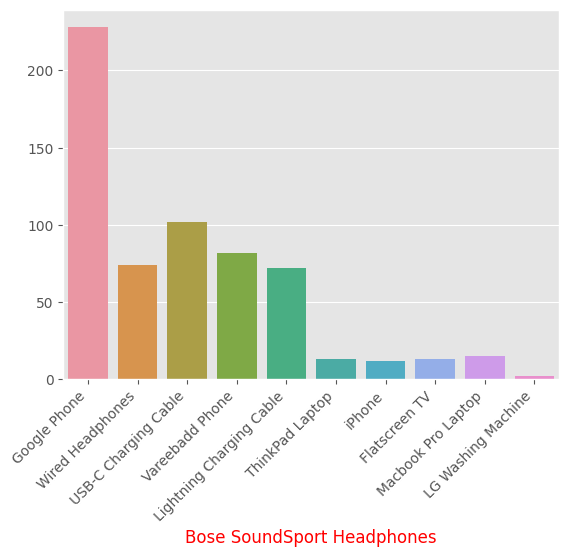

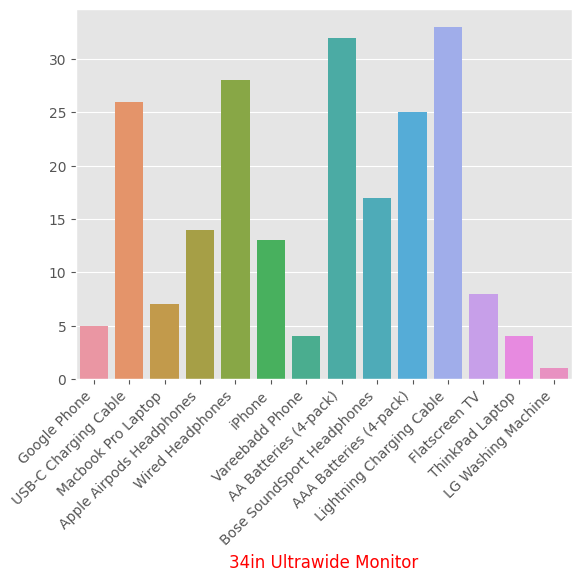

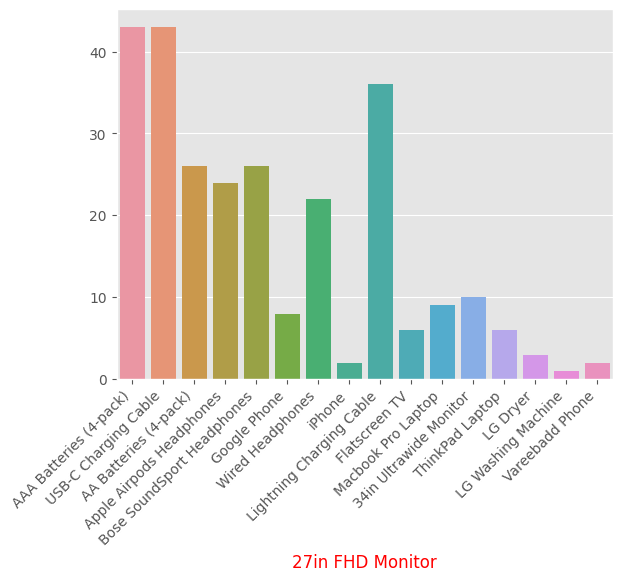

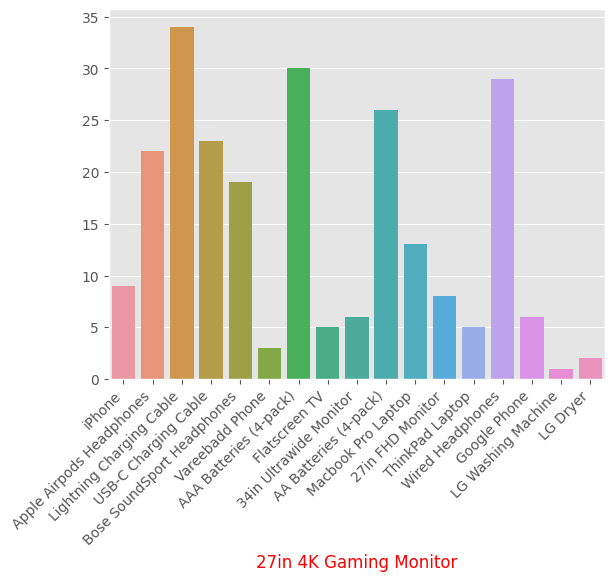

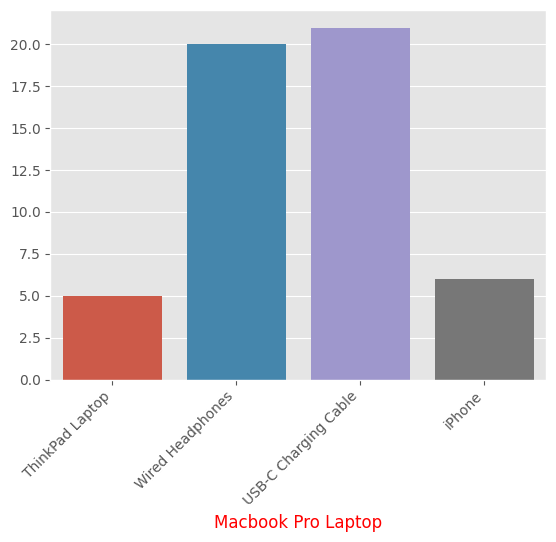

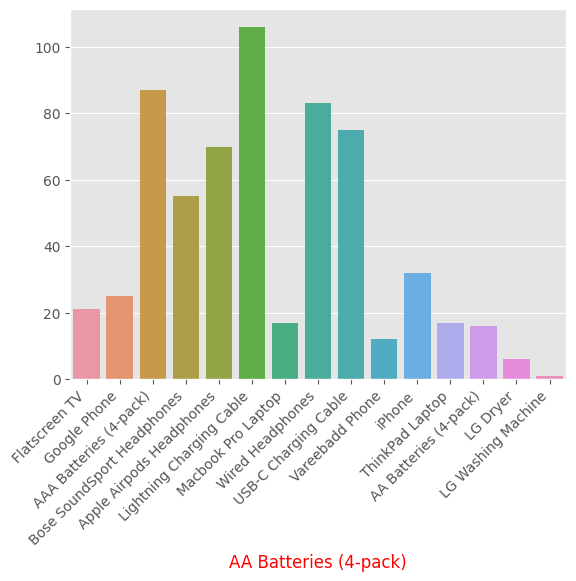

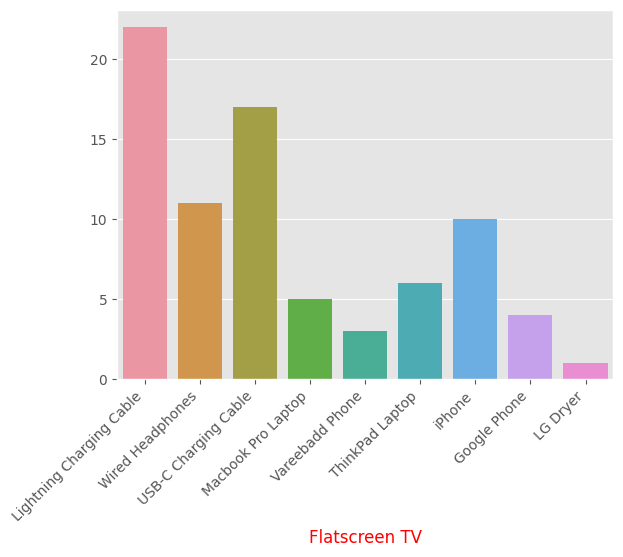

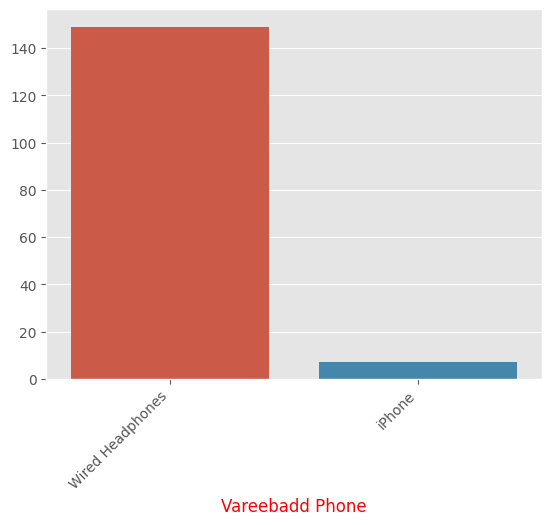

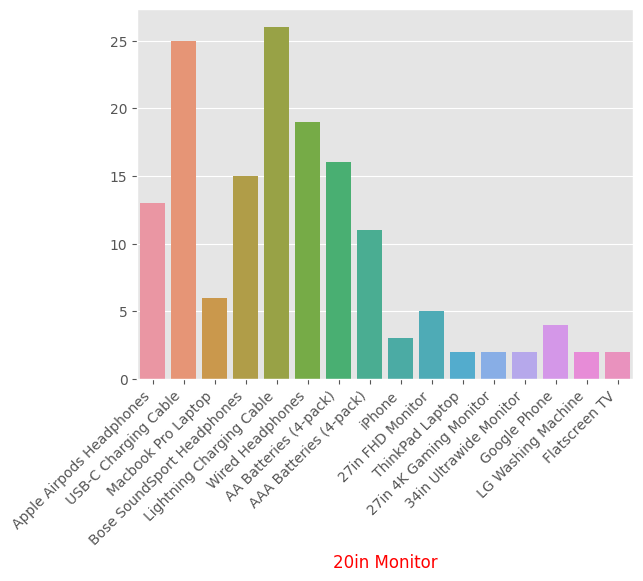

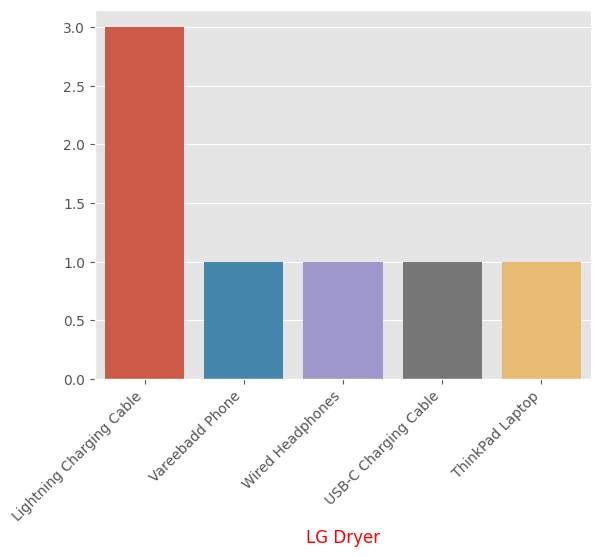

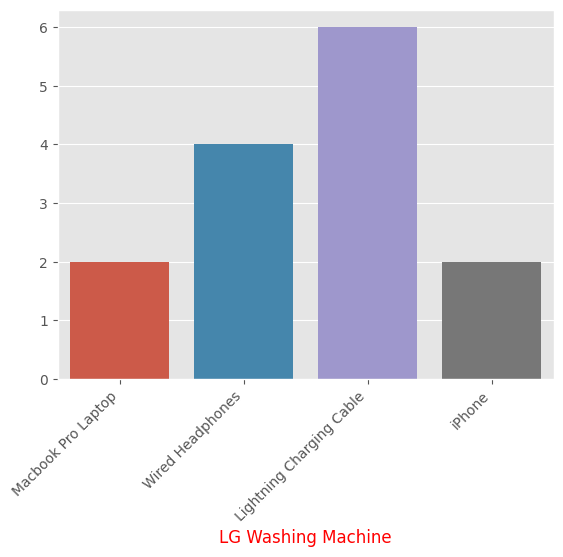

In [370]:
for prod in result.keys():
  prod_ = result[prod]
  json = {}
  for prod__ in prod_.keys():
    json = {**json, **{prod__ : [prod_[prod__]]}}
  if json !={}:
    ax = sns.barplot(pd.DataFrame(json))
    xticklabels = ax.get_xticklabels()
    ax.set_xticklabels(xticklabels, rotation=45, ha='right')
    plt.xlabel(prod, color='red')
    plt.show()

#What product sold the most? Why do you think it sold the most?


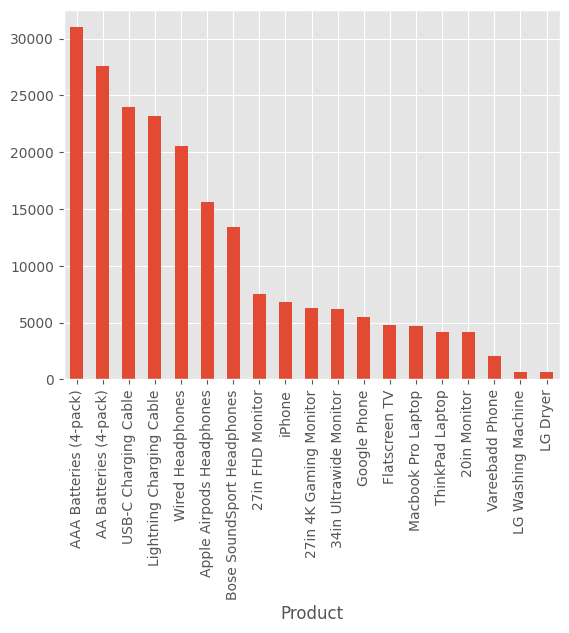

Product
AAA Batteries (4-pack)        30986
AA Batteries (4-pack)         27615
USB-C Charging Cable          23931
Lightning Charging Cable      23169
Wired Headphones              20524
Apple Airpods Headphones      15637
Bose SoundSport Headphones    13430
27in FHD Monitor               7541
iPhone                         6847
27in 4K Gaming Monitor         6239
34in Ultrawide Monitor         6192
Google Phone                   5529
Flatscreen TV                  4813
Macbook Pro Laptop             4725
ThinkPad Laptop                4128
20in Monitor                   4126
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [391]:
df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()
df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)